In [1]:
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def get_chat_data(filename):
    with open(filename, mode='r', encoding='UTF-8', errors='ignore') as fp:
        soup = BeautifulSoup(fp, "lxml", from_encoding='utf-8')

        # delete the <head>, useless for this project
        soup.find('head').decompose() 
        # delete the blue Facebook header
        soup.find('div', id="bluebarRoot").decompose()
        # delete the <p> tag
        soup.find('p').decompose()

        # extracts a tag which refers to the creation of the HTML file
        for gen in soup.find_all(text=re.compile("^Generated")):
            div = gen.find_parent("div") 
            if div:
                div.extract() # saves a safety feature

        # extracts other tags like sent images from our data
        for other_tags in soup.find_all(lambda tag: not tag.name == "br"):
            if len(other_tags.text) == 0:
                other_tags.extract()

        # print the prettified HTML
        # print(soup.prettify())

        # Facebook Messenger date format: Jun 8, 2013, 10:50 PM
        date_pattern = re.compile(r'^[A-Z]{1}[a-z]{2}\s\d+[,]\s\d{4}[,]\s\d{1,2}[:]\d{2}\s\w[AM|PM]$')
        container = soup.body.find_all("div",class_='pam _3-95 _2pi0 _2lej uiBoxWhite noborder')

        name = []
        text = []
        date = []
        for obj in container:
            name.append(obj.find('div',class_='_3-96 _2pio _2lek _2lel').text)
            text.append(obj.find('div',class_='_3-96 _2let').text)
            if re.match(date_pattern, obj.find('div',class_='_3-94 _2lem').text):
                date.append(obj.find('div',class_='_3-94 _2lem').text)

        # create pandas dataframe from our data and save it in a csv file
        df = pd.DataFrame({'sender': name, 'text': text, 'date': date})
        df.to_csv('chatdata.csv', index=False, na_rep="N/A", date_format='%b %d, %Y, %I:%M %p')

In [3]:
get_chat_data(r"\Path\to\File\message.html")

df = pd.read_csv('chatdata.csv')
df['date'] = pd.to_datetime(df['date'])

L = ['year', 'month', 'day', 'hour', 'minute', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter']
df = df.join(pd.concat((getattr(df['date'].dt, i).rename(i) for i in L), axis=1))

df['weekend'] = ((pd.DatetimeIndex(df['date']).dayofweek) // 5 == 1).astype(int)

# df.drop("date", axis=1, inplace=True)

# df.head()

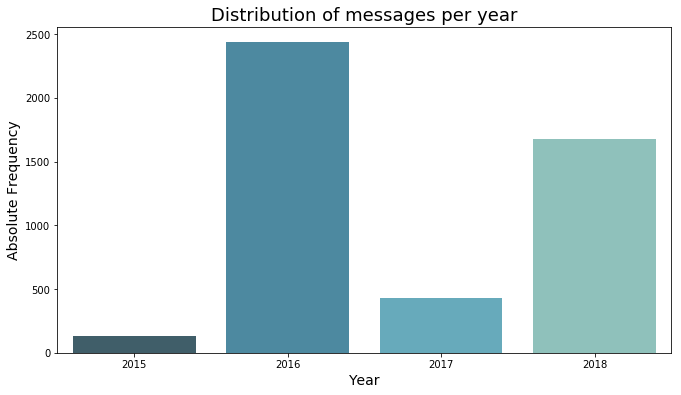

In [4]:
plt.figure(figsize=(11,6))
sns.countplot(x='year', data=df, palette='GnBu_d')
plt.ylabel('Absolute Frequency', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.title("Distribution of messages per year", fontsize=18)
plt.show()

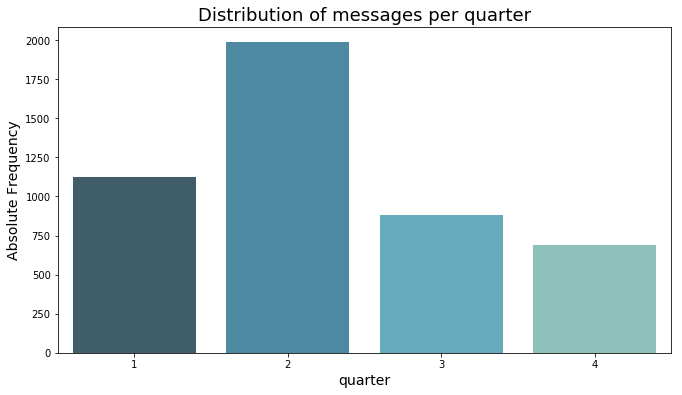

In [5]:
plt.figure(figsize=(11,6))
sns.countplot(x='quarter', data=df, palette='GnBu_d')
plt.ylabel('Absolute Frequency', fontsize=14)
plt.xlabel('quarter', fontsize=14)
plt.title("Distribution of messages per quarter", fontsize=18)
plt.show()

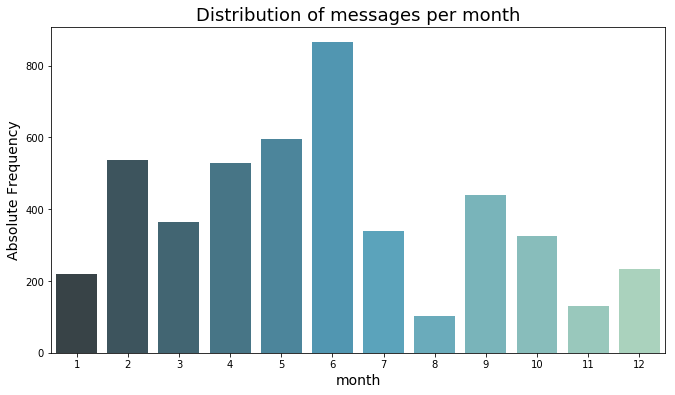

In [6]:
plt.figure(figsize=(11,6))
sns.countplot(x='month', data=df, palette='GnBu_d')
plt.ylabel('Absolute Frequency', fontsize=14)
plt.xlabel('month', fontsize=14)
plt.title("Distribution of messages per month", fontsize=18)
plt.show()

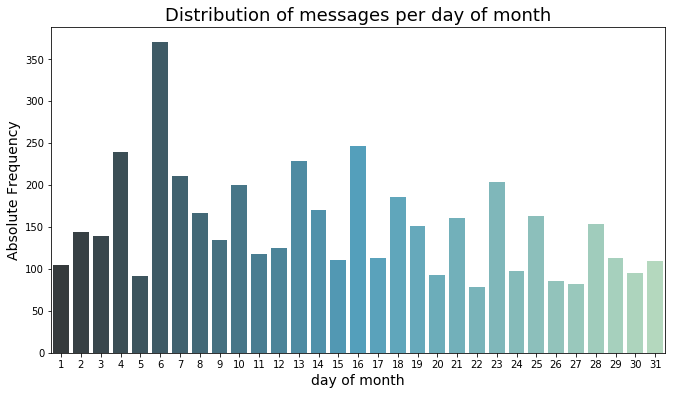

In [7]:
plt.figure(figsize=(11,6))
sns.countplot(x='day', data=df, palette='GnBu_d')
plt.ylabel('Absolute Frequency', fontsize=14)
plt.xlabel('day of month', fontsize=14)
plt.title("Distribution of messages per day of month", fontsize=18)
plt.show()

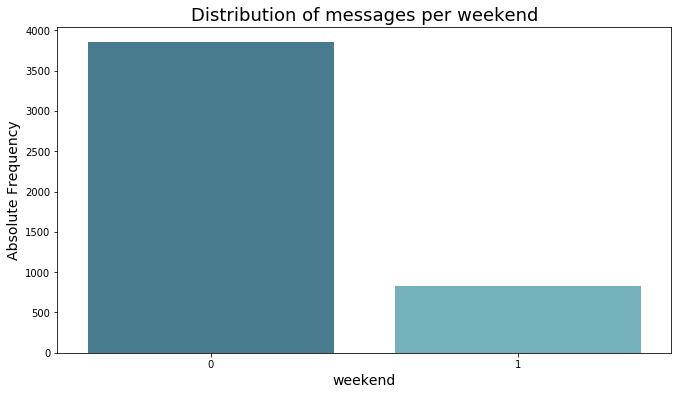

In [8]:
plt.figure(figsize=(11,6))
sns.countplot(x='weekend', data=df, palette='GnBu_d')
plt.ylabel('Absolute Frequency', fontsize=14)
plt.xlabel('weekend', fontsize=14)
plt.title("Distribution of messages per weekend", fontsize=18)
plt.show()

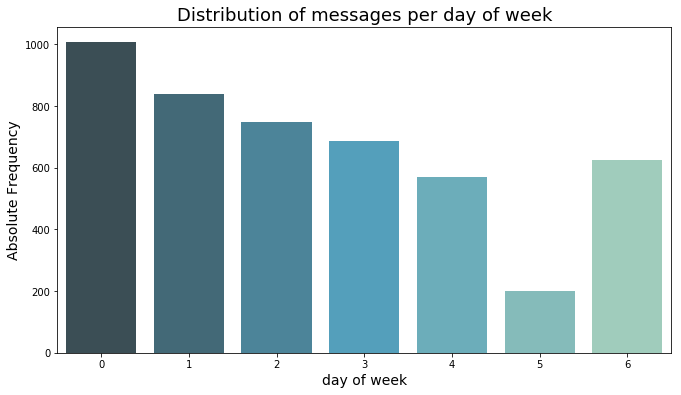

In [9]:
plt.figure(figsize=(11,6))
sns.countplot(x='dayofweek', data=df, palette='GnBu_d')
plt.ylabel('Absolute Frequency', fontsize=14)
plt.xlabel('day of week', fontsize=14)
plt.title("Distribution of messages per day of week", fontsize=18)
plt.show()

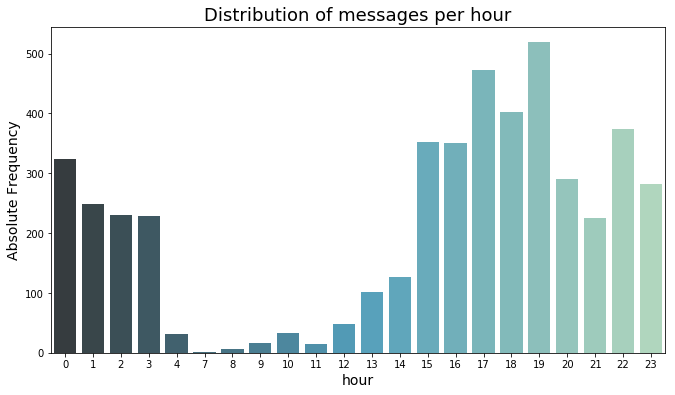

In [10]:
plt.figure(figsize=(11,6))
sns.countplot(x='hour', data=df, palette='GnBu_d')
plt.ylabel('Absolute Frequency', fontsize=14)
plt.xlabel('hour', fontsize=14)
plt.title("Distribution of messages per hour", fontsize=18)
plt.show()

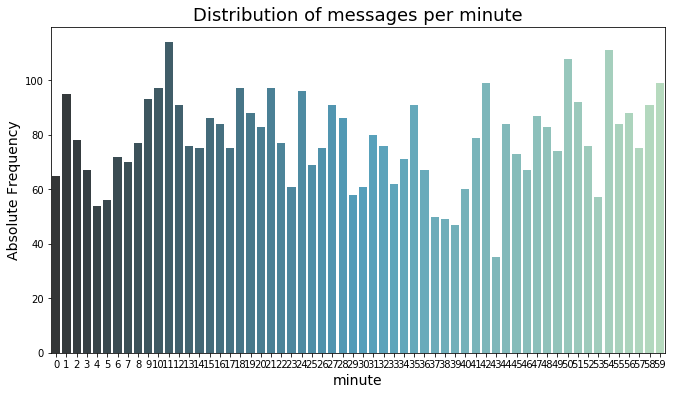

In [11]:
plt.figure(figsize=(11,6))
sns.countplot(x='minute', data=df, palette='GnBu_d')
plt.ylabel('Absolute Frequency', fontsize=14)
plt.xlabel('minute', fontsize=14)
plt.title("Distribution of messages per minute", fontsize=18)
plt.show()

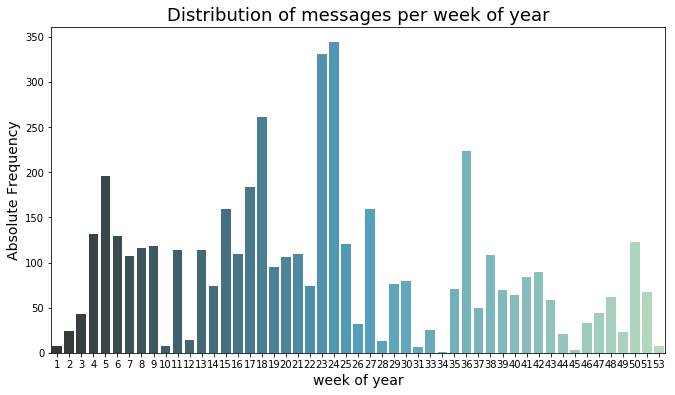

In [12]:
plt.figure(figsize=(11,6))
sns.countplot(x='weekofyear', data=df, palette='GnBu_d')
plt.ylabel('Absolute Frequency', fontsize=14)
plt.xlabel('week of year', fontsize=14)
plt.title("Distribution of messages per week of year", fontsize=18)
plt.show()